## Equally-Weighted Portfolio Backtest.

In [1]:
from __future__ import annotations

%load_ext autoreload
%autoreload 2

In [2]:
from qamsi.config.trading_config import TradingConfig
from qamsi.strategies.heuristics.equally_weighted import EWStrategy
from run import Dataset, initialize

In [3]:
REBAL_FREQ = "ME"
DATASET = Dataset.TOPN_US
TOP_N = 225

trading_config = TradingConfig(
    total_exposure=1,
    max_exposure=1,
    min_exposure=0,
    trading_lag_days=1,
)

preprocessor, runner = initialize(
    dataset=DATASET,
    with_causal_window=False,
    trading_config=trading_config,
    topn=TOP_N,
    rebal_freq=REBAL_FREQ,
)

Backtest on 2000-12-29 00:00:00 to 2024-07-31 00:00:00
Num Train Iterations: 283
Num OOS Daily Points: 5932


In [4]:
strategy = EWStrategy()

strategy_name = strategy.__class__.__name__

result = runner(
    feature_processor=preprocessor,
    strategy=strategy,
    hedger=None,
)
result

Computing Weights: 100%|██████████| 283/283 [00:49<00:00,  5.68it/s]


StrategyStatistics:
* final_nav = 6.618933
* geom_avg_total_r = 0.104511
* geom_avg_xs_r = 0.076227
* std_xs_r = 0.217320
* min_xs_r = -0.120764
* max_xs_r = 0.128372
* skew = -0.186142
* kurtosis = 11.650521
* max_dd = -0.559923
* sharpe = 0.350759
* alpha_buy_hold = 0.026940
* tracking_error_buy_hold = 0.030052
* ir_buy_hold = 0.896457
* factor_loadings = {'low_risk': -0.12557895535813313, 'momentum': 0.019594647173778304, 'quality': -0.017328753347323624, 'size': -0.04240392311081771, 'value': 0.06873466764743894, 'spx': 0.952756645833518}
* alpha_benchmark = 0.031523
* alpha_benchmark_pvalue = 0.000007
* tracking_error_benchmark = 0.028356
* ir_benchmark = 1.111705
* ttest_pval = 0.359986
* levene_pval = 0.800288
* timing_ability_coef = -0.008525
* timing_ability_pval = 0.076759

In [5]:
result.std_xs_r, result.sharpe

(0.21732024842358094, 0.3507587294701358)

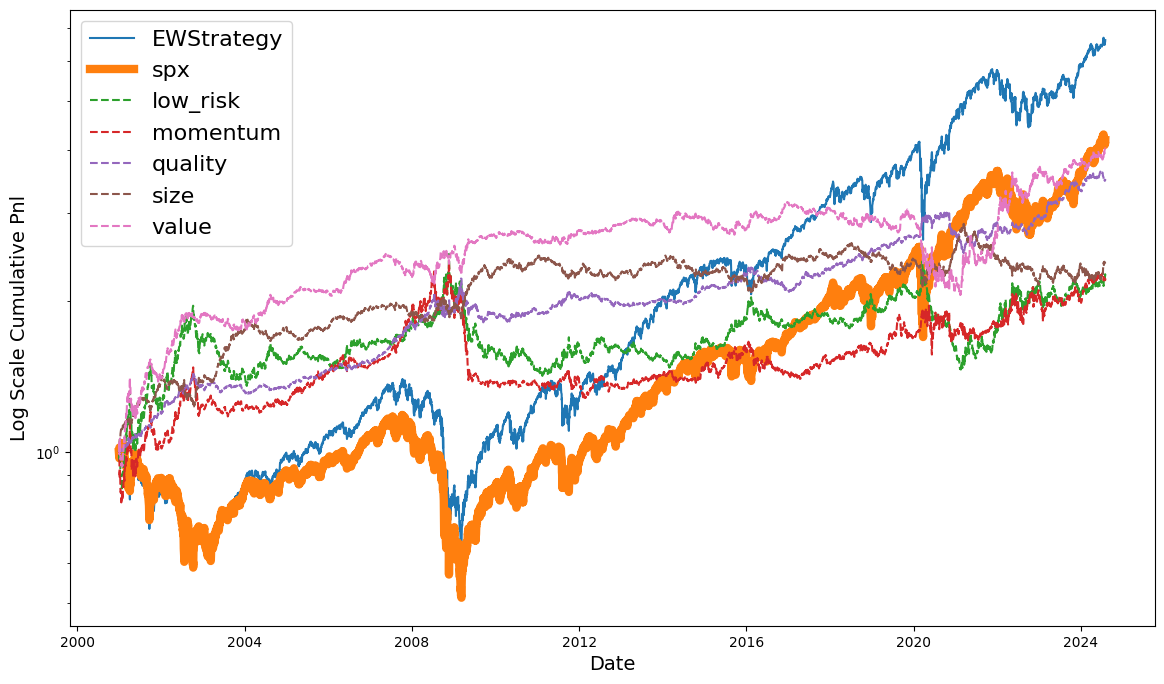

In [6]:
runner.plot_cumulative(
    strategy_name=strategy_name,
    include_factors=True,
)

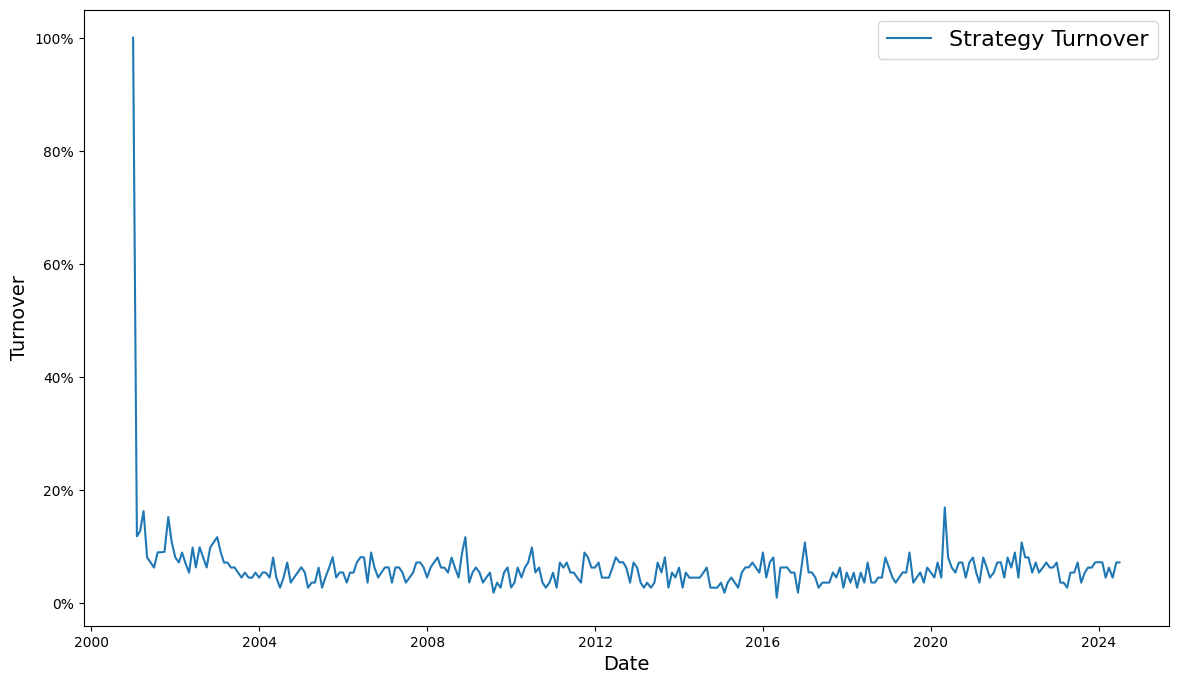

In [7]:
runner.plot_turnover()

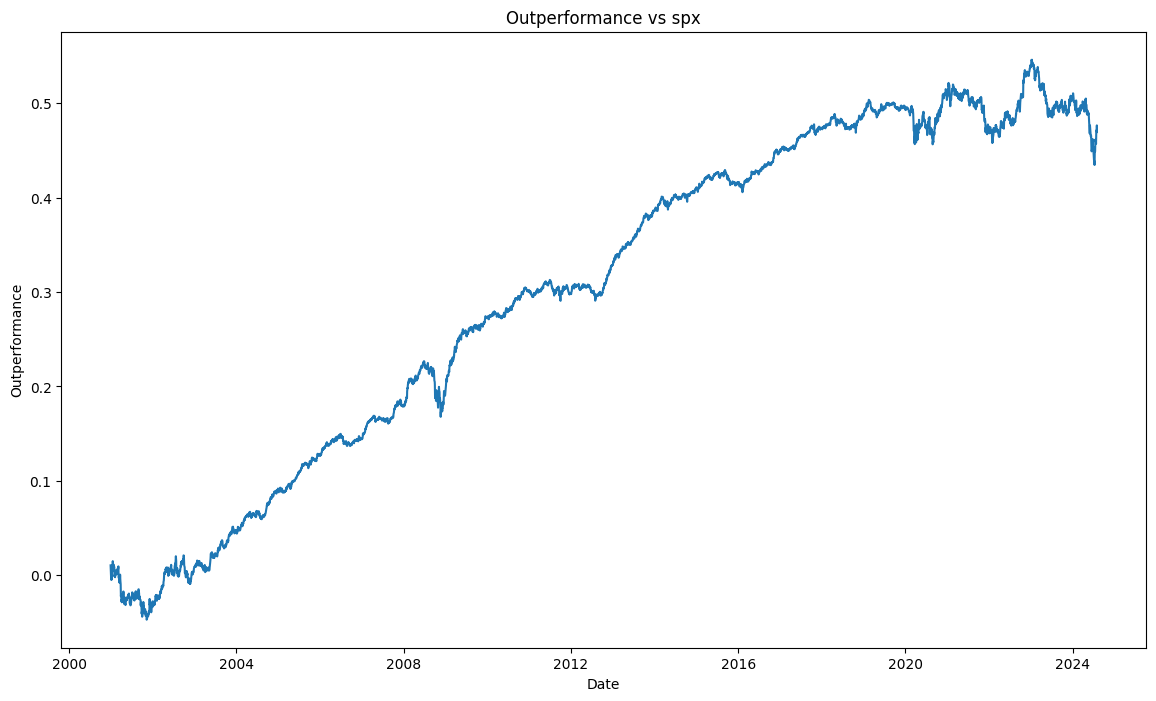

In [8]:
runner.plot_outperformance(mkt_only=True)

In [9]:
runner.save(DATASET.name + strategy_name + f"_rebal{REBAL_FREQ}")